# Dummy Classifier 

## What is a `DummyClassifier`?

DummyClassifier is a classifier that makes predictions using simple rules, which can be
useful as a baseline for comparison against actual classifiers, especially with imbalanced classes(where the class distribution is not equal or close to equal, and is instead biased or skewed).

A dummy classifier is basically a classifier which doesn’t even look at the training data while classification, but follows just a rule of thumb or strategy that we instruct it to use while classifying. It is done by including the strategy we want in the strategy parameter of the `DummyClassifier`.The main notion behind using a dummy classifier is that a classifier which is based on an analytic approach to do better than random guessing approach.


## Strategies used in Dummy Classifier

The scikit-learn `DummyClassifier` class implements several strategies for random guessing classifiers. 
The strategies are as follows:

- stratified : This strategy generates the prediction using the training set's class distribution
- most_frequent : This always predicts the most frequent label in training set.
- prior : This predicts the class that maximises the class prior.
- uniform : This generates predictions uniformly at random
- constant : Always predicts a constant label which is user defined. This is specificaly usefull for metrics that evaluate a non-majority class.

 ## Explaination through Implementation
 
The dummy classifier gives measure of "baseline" performance--i.e. the success rate one should expect to achieve even if simply guessing.

If one wishes to determine whether a given object possesses or does not possess a certain property. After analyzing a large number of the objects it is found that 90% contain the target property, then guessing that every future instance of the object possesses the target property gives a 90% likelihood of guessing correctly. Structuring these guesses is equivalent to using the `most_frequent` method in dummy clasifier

Because many machine learning tasks attempt to increase the success rate of (e.g.) classification tasks, evaluating the baseline success rate can afford a floor value for the minimal value one's classifier should out-perform. 

If one trains a dummy classifier with the `stratified` parameter using the data discussed above, that classifier will predict that there is a 90% probability that each object it encounters possesses the target property. This is different from training a dummy classifier with the `most_frequent` parameter, as the latter would guess that all future objects possess the target property. Here's some code to illustrate:

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df_train = pd.read_csv("C:/Users/sshre/OneDrive/Documents/DATA SCIENCE/train.csv")
df_train.set_index("Id").head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Id,,,,,,,,,
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [3]:
X = df_train.drop(["Outcome"],axis=1)
y = df_train["Outcome"]

Dividing the data set into training and test data for analysis

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Checking the dummyclassifier performance with different strategies.

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
strategies = ['most_frequent', 'stratified', 'uniform'] 
  
test_scores = [] 
for s in strategies: 
     
    dclf = DummyClassifier(strategy = s, random_state = 0) 
    dclf.fit(X_train, y_train)  
    prediction=dclf.predict(X_test)
    score=(accuracy_score(y_test,prediction)) 
    test_scores.append(score)
    print(score)

0.6276595744680851
0.5638297872340425
0.574468085106383


Plotting the performace score of the dummyclassifier 

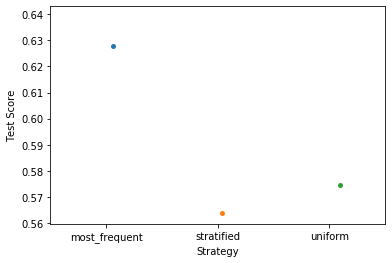

In [9]:
ax = sns.stripplot(strategies, test_scores); 
ax.set(xlabel ='Strategy', ylabel ='Test Score') 
plt.show() 

Checking the performance of `RandomForestClassifier` on the data

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
ans=RandomForestClassifier()
ans.fit(X_train,y_train)
prediction=ans.predict(X_test)
accuracy_score(y_test,prediction)

0.776595744680851

On comparing the scores of the KNN classifier with the dummy classifier, we come to the conclusion that the KNN classifier is, in fact, a good classifier for the given data.

## Imbalanced Class and `Dummy Classifier`

A major motivation for Dummy Classifier is F-score, when the positive class is in minority (i.e. imbalanced classes). This classifier is used for sanity test of actual classifier. Actually, dummy classifier completely ignores the input data. In case of 'most frequent' method, it checks the occurrence of most frequent label.

In [11]:
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name,class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [12]:
y_imbalanced = y.copy()
y_imbalanced[y_imbalanced != 1] = 0

print('Original labels:\t', y[1:20])
print('New binary labels:\t', y_imbalanced[1:20])

Original labels:	 [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:	 [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [14]:
np.bincount(y_imbalanced)

array([1615,  182], dtype=int64)

We can observe that in the above data array one class is more frequent than other which shows it is an imbalanced class

In [20]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_imbalanced, random_state=0)

# Accuracy of Support Vector Machine classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(X_train1, y_train1)
gnb.score(X_test1, y_test1)

0.5466666666666666

Here on using Naive Bayes Classifier we get a score of 0.55 , We know this is not a good score and we can use other classifiers and fit the model and check their score. 

In [24]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train1, y_train1)
clf.score(X_test1,y_test1)

0.9088888888888889

On Using RandomForestClassifier we get a score of 0.908 which is a great score and also much better than what Naive Bayes Classifier performed . 

## Using dummy classifier as baseline

In [25]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train1, y_train1)
y_dummy_predictions = dummy_majority.predict(X_test)
dummy_majority.score(X_test1, y_test1)

0.9044444444444445

We observe that the RandomForest classsifier score is not much compared to dummy classifier which also has a score of more than .90 . Which shows that RandomForest is not a right fit for the model despite the good score.
This makes us realise that we need a better model which scores better .

In [27]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=1).fit(X_train1, y_train1)
svm.score(X_test1, y_test1)

0.9955555555555555

On using SVM classifier using RBF kernel for the model,gives a whoping score of 0.99 which is a good score as well as it  performce better than dummy classifier which is our baseline. 

*Thus, Dummy Classifier works as a baseline and gives an idea of the performance of the model on dataset*
